#Dataset Link:
https://www.kaggle.com/competitions/digit-recognizer/overview

#Import Packages

In [352]:
import pandas as pd
import numpy as np
import tensorflow as tf
import os
import pathlib
import matplotlib.pyplot as plt

#Read Dataset

In [295]:
shape = (28, 28, 1)
batch_size = 128

In [303]:
dataset_train = pd.read_csv("train.csv")
dataset_test = pd.read_csv("test.csv")
dataset_train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [304]:
dataset_test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Detect Features and label

In [305]:
label = dataset_train['label']
features = dataset_train.drop(['label'], axis = 1)

In [306]:
features = np.asarray(features)

In [307]:
features.shape

(42000, 784)

In [308]:
features = features.reshape((42000, 28, 28))

In [309]:
features.shape

(42000, 28, 28)

In [310]:
label = tf.keras.utils.to_categorical(label)

## Plot Some Sample of Dataset

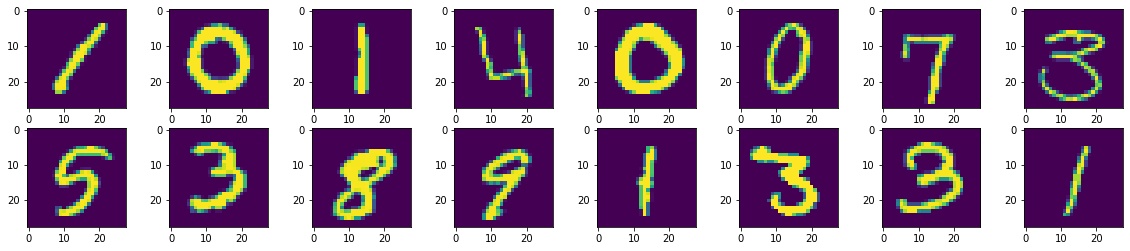

In [318]:
plt.figure(figsize = (20, 4))
for i in range(16):
  plt.subplot(2, 8, i + 1)
  plt.imshow(features[i])
plt.show()

#Define CNN Model

In [319]:
def create_model():
  left_input = tf.keras.layers.Input(shape = shape)
  filter = 32
  x = left_input
  for i in range(3):
    x = tf.keras.layers.Conv2D(filter,3, activation = "relu", padding = 'same')(x)
    x = tf.keras.layers.Dropout(0.4)(x)
    x = tf.keras.layers.MaxPooling2D()(x)
    filter*=2
  right_input = tf.keras.layers.Input(shape = shape)
  y = right_input
  filter = 32
  for i  in range(3):
    y = tf.keras.layers.Conv2D(filter,3, activation = "relu", padding = 'same', dilation_rate = 2)(y)
    y = tf.keras.layers.Dropout(0.4)(y)
    y = tf.keras.layers.MaxPooling2D()(y)
    filter*=2
  x = tf.keras.layers.GlobalAveragePooling2D()(x)
  y = tf.keras.layers.GlobalAveragePooling2D()(y)
  m = tf.keras.layers.concatenate([x, y])
  m = tf.keras.layers.Dropout(0.4)(m)
  output = tf.keras.layers.Dense(10, activation = "softmax")(m)
  m = tf.keras.models.Model([left_input, right_input], output)
  return m  

In [320]:
m = create_model()
m.summary()

Model: "model_16"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_46 (InputLayer)          [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 input_47 (InputLayer)          [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 conv2d_144 (Conv2D)            (None, 28, 28, 32)   320         ['input_46[0][0]']               
                                                                                                  
 conv2d_147 (Conv2D)            (None, 28, 28, 32)   320         ['input_47[0][0]']               
                                                                                           

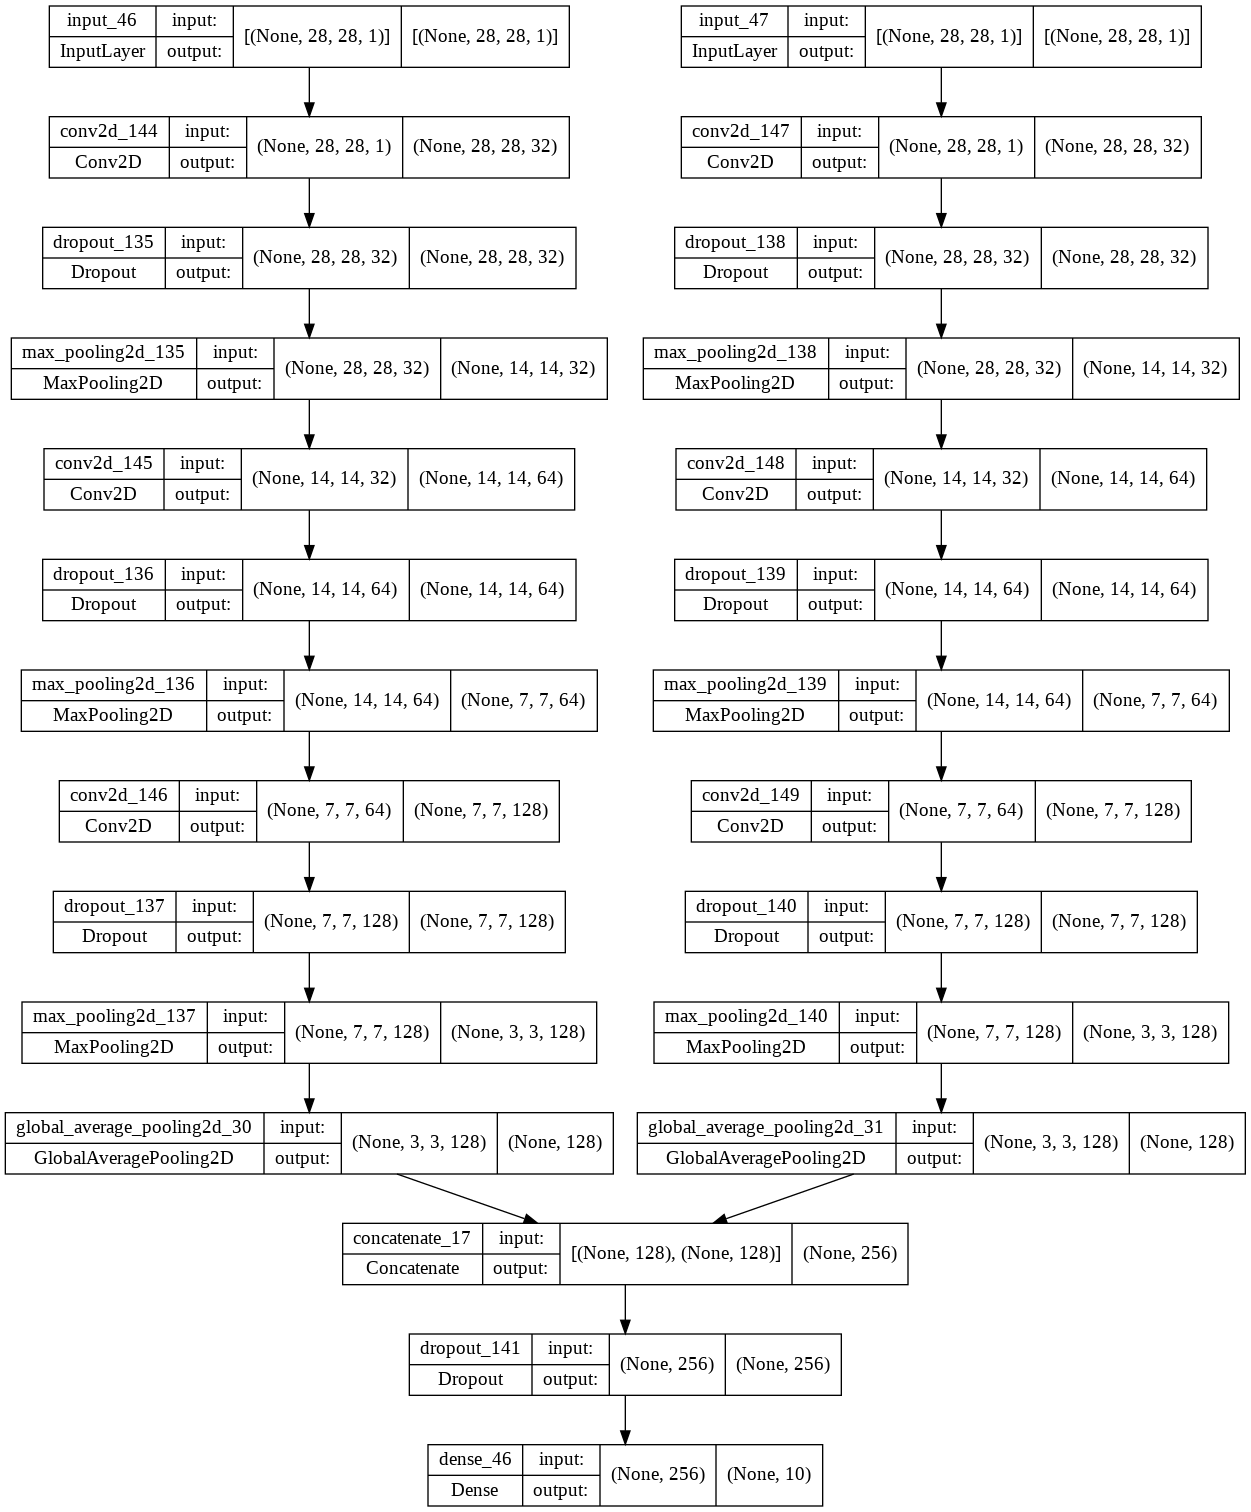

In [321]:
tf.keras.utils.plot_model(m, show_shapes = True)

In [322]:
m.compile(optimizer=tf.optimizers.Adam(learning_rate=0.001), loss= "categorical_crossentropy"
              , metrics = ['accuracy'])

In [323]:
history = m.fit([features, features], label, batch_size=128, epochs=160, verbose=True,
                validation_split = 0.2,
                callbacks = [tf.keras.callbacks.EarlyStopping(patience= 20, monitor='val_loss', mode = 'min', restore_best_weights=True)])

Epoch 1/160
263/263 [==============================] - 4s 14ms/step - loss: 3.3412 - accuracy: 0.6510 - val_loss: 0.4765 - val_accuracy: 0.9525
Epoch 2/160
263/263 [==============================] - 3s 12ms/step - loss: 0.3041 - accuracy: 0.9035 - val_loss: 0.2525 - val_accuracy: 0.9710
Epoch 3/160
263/263 [==============================] - 3s 12ms/step - loss: 0.2007 - accuracy: 0.9382 - val_loss: 0.2028 - val_accuracy: 0.9787
Epoch 4/160
263/263 [==============================] - 3s 12ms/step - loss: 0.1623 - accuracy: 0.9510 - val_loss: 0.1754 - val_accuracy: 0.9824
Epoch 5/160
263/263 [==============================] - 3s 13ms/step - loss: 0.1377 - accuracy: 0.9582 - val_loss: 0.1332 - val_accuracy: 0.9843
Epoch 6/160
263/263 [==============================] - 3s 12ms/step - loss: 0.1218 - accuracy: 0.9632 - val_loss: 0.1381 - val_accuracy: 0.9850
Epoch 7/160
263/263 [==============================] - 3s 12ms/step - loss: 0.1081 - accuracy: 0.9670 - val_loss: 0.1036 - val_accuracy:

##Result

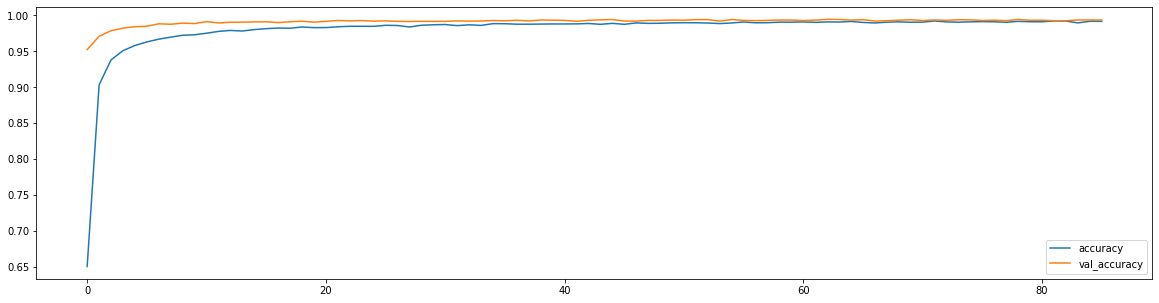

In [330]:
import matplotlib.pyplot as plt
plt.figure(figsize = (20, 5))
plt.plot(history.history['accuracy'], label = "accuracy")
plt.plot(history.history['val_accuracy'], label = "val_accuracy")
plt.legend()

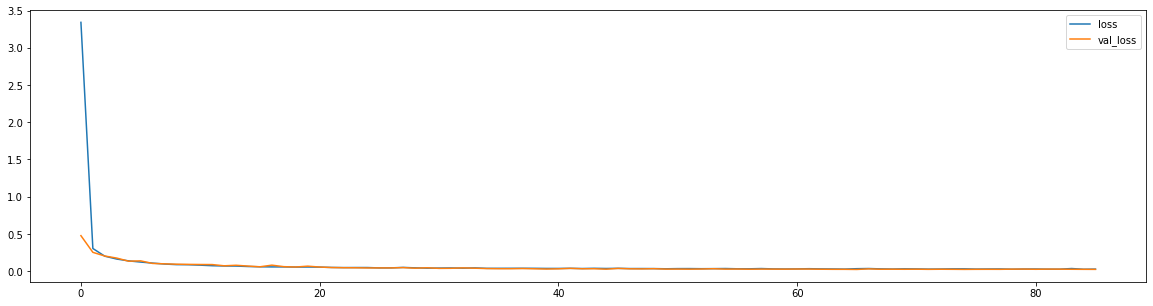

In [331]:
plt.figure(figsize = (20, 5))
plt.plot(history.history['loss'], label = "loss")
plt.plot(history.history['val_loss'], label= "val_loss")
plt.legend()

## Evaluate Model

In [326]:
m.evaluate([features, features], label, batch_size= 128)

329/329 [==============================] - 2s 5ms/step - loss: 0.0102 - accuracy: 0.9981


[0.010188776068389416, 0.9980952143669128]

In [333]:
features_test = np.asarray(dataset_test)

In [334]:
features_test.shape

(28000, 784)

In [335]:
features_test = features_test.reshape(features_test.shape[0], 28, 28)

In [347]:
y_pred = m.predict([features_test, features_test])

In [348]:
y_pred

array([[1.44296692e-07, 1.10027156e-06, 9.99992371e-01, ...,
        2.74611443e-06, 3.34052601e-07, 1.01513209e-07],
       [9.99929786e-01, 3.41389494e-08, 1.10804267e-05, ...,
        3.87800043e-07, 1.00363404e-05, 3.85667727e-06],
       [5.66289998e-07, 2.24904696e-11, 8.15998428e-05, ...,
        5.31377609e-08, 4.29753540e-03, 9.95595753e-01],
       ...,
       [3.49003752e-22, 6.16342806e-13, 3.24186424e-13, ...,
        2.14790113e-13, 9.56957638e-11, 3.28361497e-13],
       [2.05243191e-06, 3.39228291e-06, 1.08985967e-06, ...,
        4.41164506e-04, 3.97067524e-05, 9.96941507e-01],
       [1.10371164e-10, 4.25634250e-10, 9.99999523e-01, ...,
        4.44507675e-09, 1.48961874e-07, 1.29330735e-09]], dtype=float32)

In [349]:
y_pred = np.argmax(y_pred, axis = 1)

In [350]:
y_pred

array([2, 0, 9, ..., 3, 9, 2])